# FMCA interface to Image Wedgelets

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import FMCA

In [2]:
im = np.array(Image.open('LuganoMuensterSmall.png').convert('RGB'))
h, w, c = im.shape 
N = h * w

x = np.arange(w)
y = np.arange(h)
Gx, Gy = np.meshgrid(x, y, indexing='xy')

P = np.empty((2, N), order='F')
P[0, :] = Gx.ravel(order='F')
P[1, :] = Gy.ravel(order='F') 

rgb = np.array(im.reshape(N, c, order='F'), order='F')

print(P.shape, rgb.shape)

(2, 160000) (160000, 3)


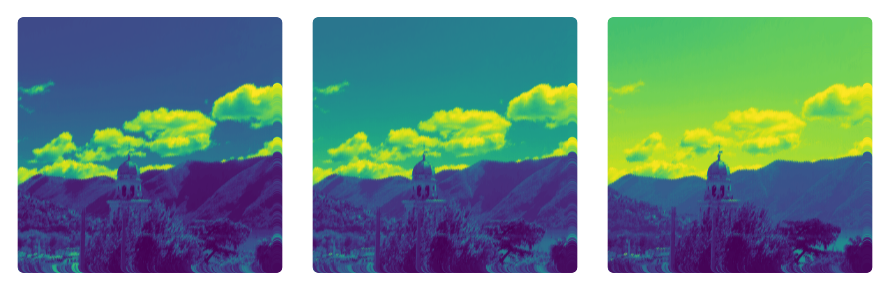

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for i in range(3):
    axes[i].scatter(P[0, :], P[1, :], c=rgb[:, i].T/255)
    axes[i].invert_yaxis()
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
WT = FMCA.WedgeletTree()
WT.init(P, 6)


P: 2x splits: 6


initial leaf error: 0.488171
initial leaf error: 2.16668
initial leaf error: 0.4824
initial leaf error: 3.35229
initial leaf error: 200.064
initial leaf error: 13.5981
initial leaf error: 12.2237
initial leaf error: 332.572
initial leaf error: 0.408426
initial leaf error: 0.415642
initial leaf error: 0.380933
initial leaf error: 0.362756
initial leaf error: 0.613256
initial leaf error: 290.037
initial leaf error: 36.2978
initial leaf error: 664.285
initial leaf error: 619.519
initial leaf error: 512.71
initial leaf error: 484.15
initial leaf error: 214.743
initial leaf error: 380.858
initial leaf error: 666.507
initial leaf error: 1091.91
initial leaf error: 594.965
initial leaf error: 179.692
initial leaf error: 276.87
initial leaf error: 582.965
initial leaf error: 812.796
initial leaf error: 232.492
initial leaf error: 259.898
initial leaf error: 173.864
initial leaf error: 152.768
initial leaf error: 0.431922
initial leaf error: 0.407727
initial leaf error: 0.432231
initial leaf er

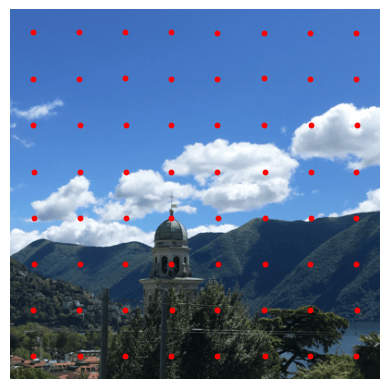

In [7]:
WT.computeWedges(P, rgb, 4, 1e-2)
lm = WT.landmarks(P)
print(h, w, lm)
img_out = rgb.reshape((h, w, 3), order='F')
plt.imshow(img_out)
plt.scatter(lm[0,:], h - lm[1,:] - 1, s=10, c='red', marker='o')
plt.axis('off')
plt.show()

In [8]:
rgbNew = WT.compress(P, rgb)
M_min = rgbNew.min()
M_max = rgbNew.max()
rgb_scaled = (rgbNew - M_min) / (M_max - M_min)
print(rgb_scaled)

[[0.26876597 0.3975209  0.61347612]
 [0.26885175 0.3974427  0.61347832]
 [0.26894884 0.39740309 0.61355703]
 ...
 [0.19238473 0.23476658 0.26422385]
 [0.20265053 0.24883792 0.28391782]
 [0.21365841 0.26424654 0.30618271]]


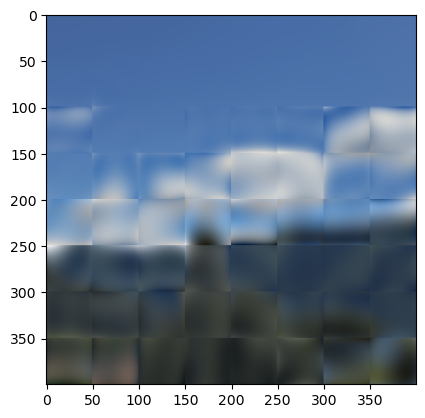

In [9]:
img_out = rgb_scaled.reshape((h, w, 3), order='F')
plt.imshow(img_out)